               0
count  37.000000
mean   27.773789
std     0.768900
min    26.048300
25%    27.326700
50%    27.697700
75%    28.435600
max    29.287800


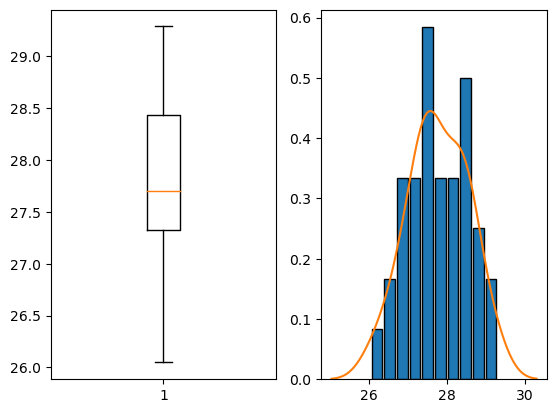

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap


file1= '/home/ben/ictp/numforGeosciences-ICTP/datasets/lec1-sample.txt'
data = np.loadtxt(file1)

plt.subplot(1,2,1) # boxplot
plt.boxplot(data) 
plt.subplot(1,2,2) # histogram
plt.hist(data, bins=10, rwidth=0.85, edgecolor = "k", density = 1.0)

# kernel density estimation
kde_obj = stats.gaussian_kde(data)
x_pts = np.linspace(min(data)-1, max(data)+1, 100)
estimated_pdf = kde_obj.evaluate(x_pts)
plt.plot(x_pts, estimated_pdf)

df = pd.DataFrame(data)
print(df.describe())

Text(0.0, 1.0, 'Mean Temperature')

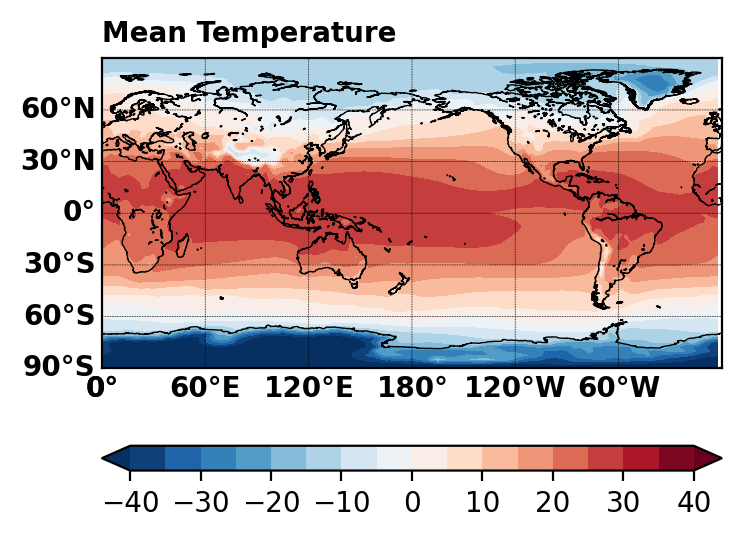

In [2]:
file2 = "/home/ben/ictp/numforGeosciences-ICTP/datasets/lec1-era5_tas_1959_2021_25deg.nc"
f1 = nc.Dataset(file2)
lon = f1.variables['lon'][:]
lat = f1.variables['lat'][:]
var = f1.variables['t2m'][:,:,:]
tas = np.average(var-273.15, axis=0)
lonall, latall = np.meshgrid(lon, lat)
plt.figure(num=None, figsize=(4, 4), dpi=200, facecolor='w', edgecolor='k')
m = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution="l")
m.drawcoastlines(linewidth=0.5)
x, y = m(lonall, latall)
levels=[-40,-35,-30, -25, -20, -15,-10,-5, 0, 5,10,15, 20, 25, 30, 35,40]
jjj=m.contourf(x,y,tas[:,:],levels=levels, extend = 'both', cmap=plt.cm.RdBu_r)
m.colorbar(jjj,location='bottom',size="8%", pad='25%')
parallels = np.arange(-90,90,30.) # make latitude lines
meridians = np.arange(-180,180,60.) # make longitude lines
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,weight='bold',linewidth=0.3)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10,weight='bold', linewidth=0.3)
plt.title("Mean Temperature", loc='left',fontsize=10,weight='bold')

To make it simple, the mean, variance and standard variation are calcuated based on the avarage temperature

In [3]:
print(np.mean(tas))
print(np.std(tas))
print(np.median(tas, axis = None))

4.6766925
20.268944
8.69488


/home/ben/miniconda3/envs/geo/lib/python3.11/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
